# Exploring map projections

Here we'll look at a few map projections and help you to choose between them.

Lots of visualisations are based around maps representing quantities, such as temperature, varying on the Earth's surface (or other surfaces parallel to it). The Earth is (roughly) an ellipsoid and so we must find a way of "flattening" it in order to represent it on a screen or pieces of paper. The formula for this flattening is a map projection.

We'll start with perhaps the most commonly-used projection...

## Latitude-longitude projection

We can simply plot latitude against longitude. This gives the "Plate Carrée", "Equidistant Cylindrical" or "Equirectangular" projection.

In [1]:
# We'll start by importing some mapping libraries. Here we are using Cartopy,
# although other mapping libraries (such as Basemap) exist:

import matplotlib.pyplot as plt  # Matplotlib plotting library
import cartopy.crs as ccrs       # "crs" is "coordinate reference system"

import warnings
warnings.filterwarnings(action='ignore') # Cartopy emits warnings that aren't useful here

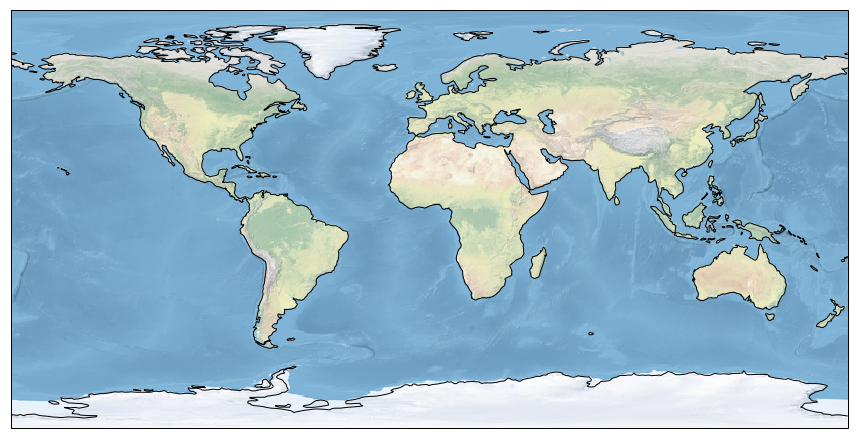

In [2]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global() # Show the whole globe

ax.stock_img()  # Adds a nice background image
ax.coastlines() # Draws coastlines
plt.show()

We can look at the distortion introduced by this projection by plotting "**Tissot's indicatrices**". These show how circles of equal size appear when projected.

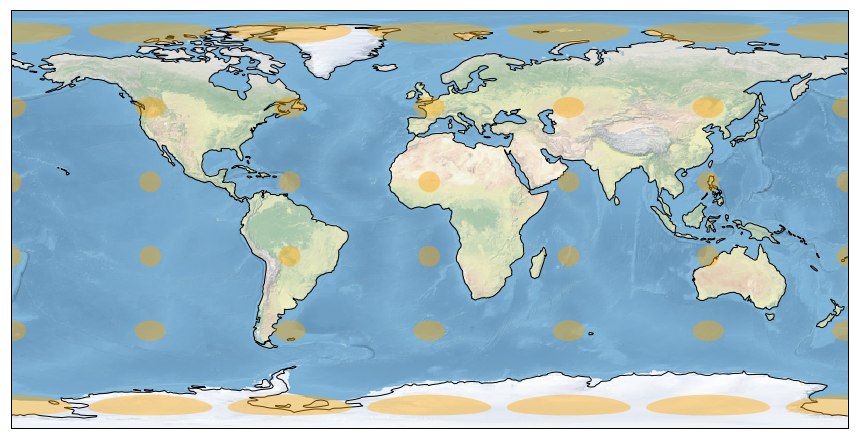

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

We can see that we are distorting both the **size** and **shape** of things as we move closer to the poles. How can we do better?

## Projection types

Different projections can preserve different attributes of the map:

 * **Equal-area**: preserves the relative areas of shapes
 * **Conformal**: preserves shapes (at least locally)
 * **Equidistant**: preserves relative distances from a point or line
 * more!
 
Here we will be concerned mostly with equal-area and conformal projections as they are generally the most useful in science.

## Equal-area projections: global scale

These projections are often used for global-scale data:

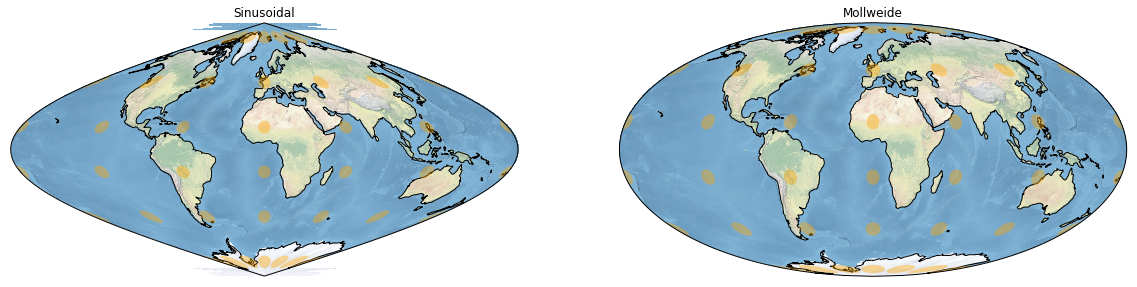

In [4]:
fig = plt.figure(figsize=(20, 10))

# TODO: Cylindrical equal-area and one other?

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Sinusoidal())
ax1.set_title("Sinusoidal")
ax1.set_global()
ax1.stock_img()
ax1.coastlines()
ax1.tissot(facecolor='orange', alpha=0.4)

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Mollweide())
ax2.set_title("Mollweide")
ax2.set_global()
ax2.stock_img()
ax2.coastlines()
ax2.tissot(facecolor='orange', alpha=0.4)

plt.show()

## Equal-area projections: regional scale

We can also preserve relative areas on a regional scale whilst reducing the distortion of shape across the area of interest:

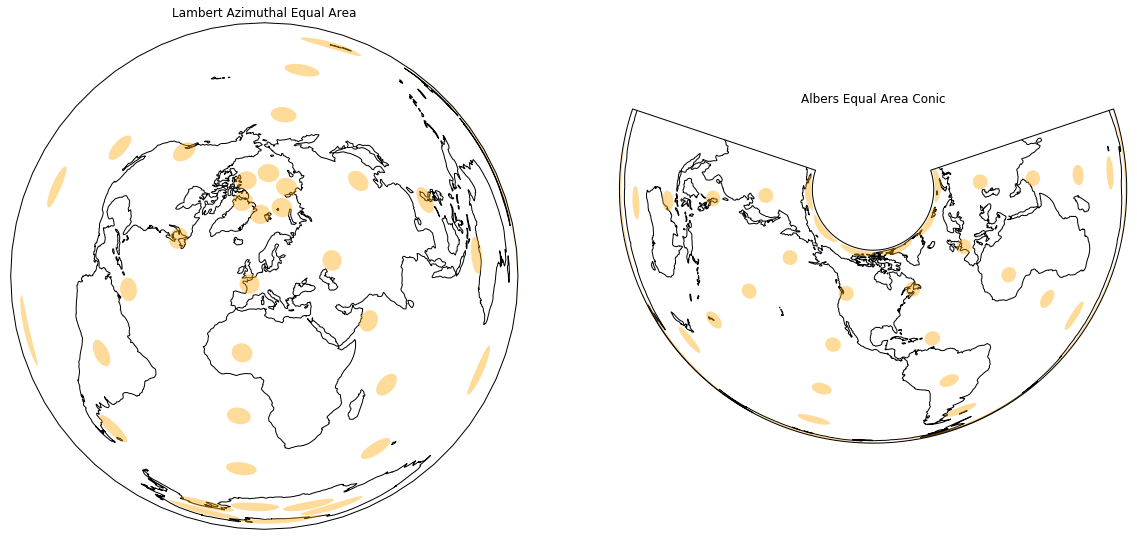

In [5]:
fig = plt.figure(figsize=(20, 10))

# A standard projection for the European Union
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.LambertAzimuthalEqualArea(central_longitude=10.0,
                                                                         central_latitude=52.0,
                                                                         false_easting=4321000,
                                                                         false_northing=3210000))
ax1.set_title("Lambert Azimuthal Equal Area")
# TODO: zoom in to correct region
#ax1.set_global()
#ax1.stock_img()
ax1.coastlines()
ax1.tissot(facecolor='orange', alpha=0.4)

# A standard projection used for the contiguous 48 states of the USA
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.AlbersEqualArea(central_longitude=-96.0,
                                                               central_latitude=23.0,
                                                               standard_parallels=(29.5, 45.5)))
ax2.set_title("Albers Equal Area Conic")
# TODO: zoom in to correct region
#ax2.set_global()
#ax2.stock_img()
# TODO: add state boundaries
ax2.coastlines()
ax2.tissot(facecolor='orange', alpha=0.4)

plt.show()

There are a very large number of such projections, for different regions.

## Mercator projection (conformal)

Preserves shape on a local scale. Commonly used in web-based mapping tools.

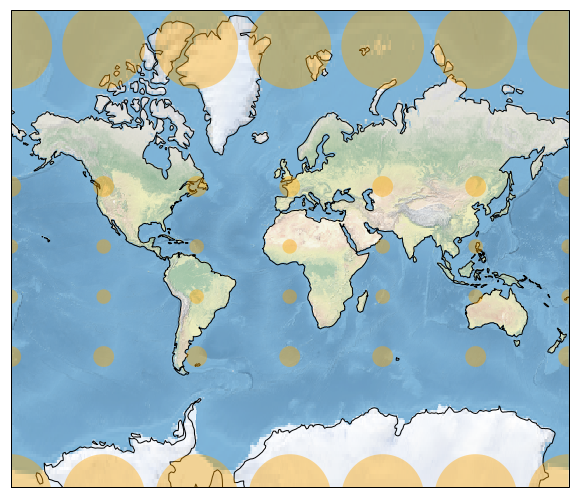

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.tissot(facecolor='orange', alpha=0.4)
plt.show()

Exaggeration of size increases very rapidly towards the poles.

## "Compromise" projections

Some projections, like the **Robinson** projection below, are neither conformal nor equal-area but are constructed as a compromise between the two, for aesthetic reasons:

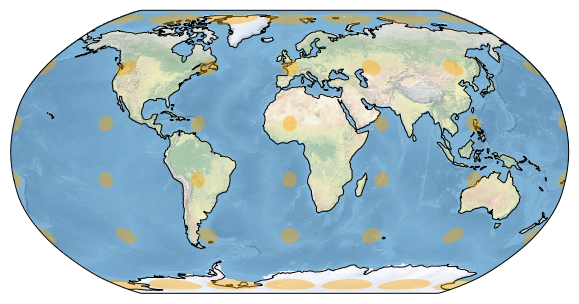

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.tissot(facecolor='orange', alpha=0.4)
plt.show()

## Country-scale projections

Countries commonly have a "standard" map projection for cartography. This is the Ordnance Survey's standard projection for mapping in Great Britain:

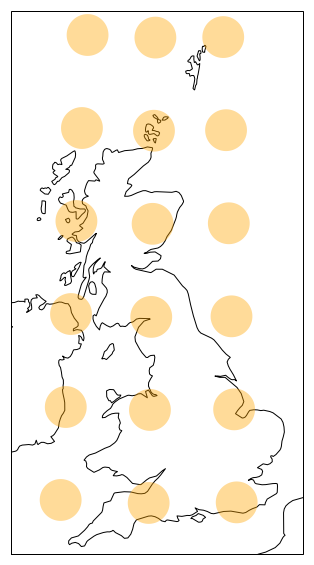

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.OSGB())
ax.set_global()
#ax.stock_img()
ax.coastlines(resolution="50m")
ax.tissot(facecolor='orange', rad_km=50, lons=range(-6,2,3), lats=range(51, 62, 2), alpha=0.4)
plt.show()

This is a type of "Transverse Mercator" projection. It is conformal, but not equal-area: however area distortions at this scale are small.

## Other projections

TODO: orthographic, stereographic

## Conclusion

Your choice of map projection depends on your needs, but our general advice is:

 * The latitude-longitude projection does not have many useful properties: consider avoiding it
 * For global-scale data, use an equal-area projection like the Mollweide
 * For regional- and country-scale data, use the standard projection for that region
 
TODO: finish this
